# DATA602 Programming Assignment 4
Please go through the file following the instructions as you go.

Rename this notebook to `DATA602_PA4_YourName.ipynb`

Note that there may be quite a few functions for you to look up in this one. Welcome to the life of a Data Scientist!

#  Data Science Consultancy for Mr. Grapeglamour's Winery Revamp🍷✨

## Background:
Mr. Gaurav Grapeglamour, a prominent wine baron, seeks consultancy services from your company to modernize his traditional wine breweries and distribution systems.

As part of the consultancy, we will utilize **"the Red Wine Quality dataset"** (on Canvas) to analyze and classify the quality of Grapeglamour's red wines. By leveraging data science techniques, we aim to optimize processes, minimize losses, and enhance overall wine quality.

*The Red Wine Quality dataset contains various physicochemical properties of red wines along with their quality ratings on a scale from 0 to 10.*

Feel free to create new cells/comments.

### Part 1 (6 points total)
#### To start, you have been asked to produce a summary of data received from the client.

##### **1.1 (1 point)** Import libraries
Import the following libraries (the rest of the library declarations are done for you below):
- **numpy** as *np*
- **pandas** as *pd*

In [ ]:
import pandas as pd
import numpy as np
import os

In [ ]:
#Run this cell
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

##### **1.2 (1 point)** Load the dataset
Load the Red Wine Quality dataset into a dataframe named **wine_data**.

In [ ]:
from google.colab import files


uploaded = files.upload()

Saving winequality-red.csv to winequality-red.csv


In [ ]:
wine_data = pd.read_csv('winequality-red.csv')
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


##### Explore the Data
Let's see what's inside the dataset first to get a feel for it. Write only a **single line** of code for each task.

**1.3 (1 point)** Print the number of **Samples** (rows) in the dataset.

In [ ]:
wine_data.shape[0]
# print(len(wine_data))

1599

**1.4 (1 point)** Print the number of **Features** in the dataset, excluding Quality which is a label.

In [ ]:
wine_data.shape[1]

12

**1.5 (1 point)** Print the **unique** values in the *Quality* column.

In [ ]:
wine_data['quality'].unique()

array([5, 6, 7, 4, 8, 3])

##### **1.6 (1 points)** Preprocessing of the Data
Before we dive deep, we need to prep the data to make it usable.

Handle the **missing values** in the data by **discarding them.** Meaning, drop the rows which have any missing values.

In [ ]:
wine_data.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


### Part 2: Data Visualization (8 points total)
The matplotlib and seaborn libraries are great tools for visualizing data.

They are used to create very legible and complex graphs that are essential in data interpretation and analysis.

In [ ]:
#run this cell
import matplotlib.pyplot as plt
import seaborn as sns

##### **2.1 (6 points)** Visualize the distribution of each feature in the original dataset for different quality values.
- **Plot** out a histogram for each feature (Useful to use a for loop)
- Note: each histogram is actually *n* histograms next to each other, one for each unique value of *Quality*.
- Label the **title** of each histogram "Distribution of [Feature Name] by Quality"
- Label the **axes** appropriately and display each histogram.

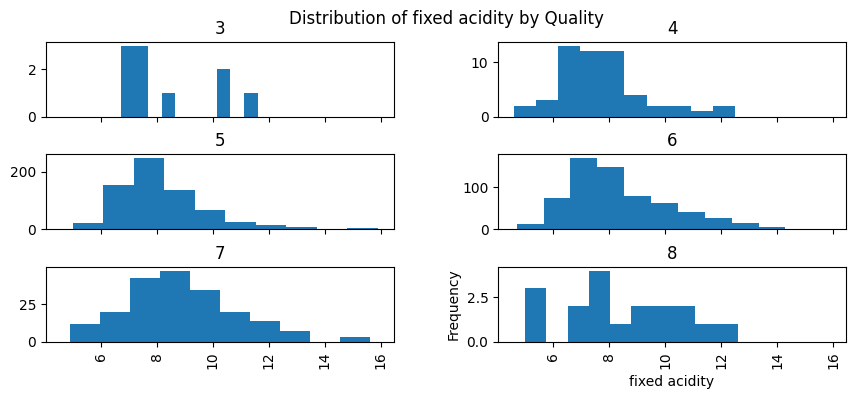

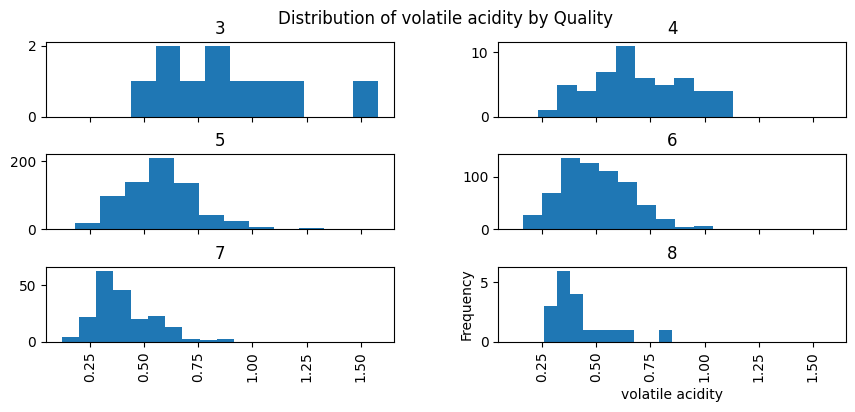

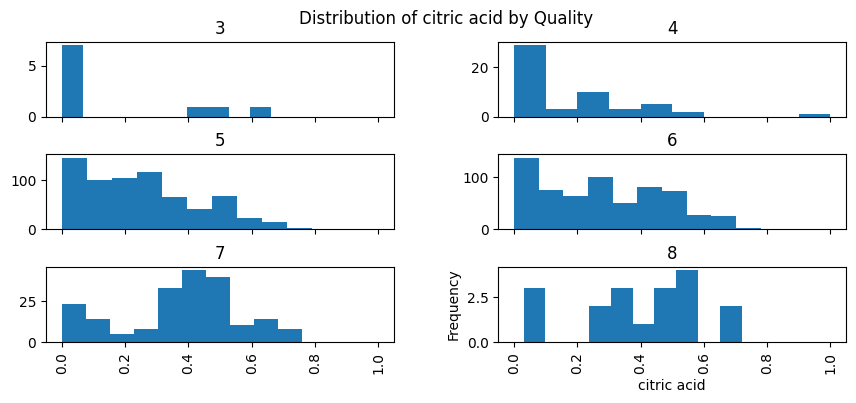

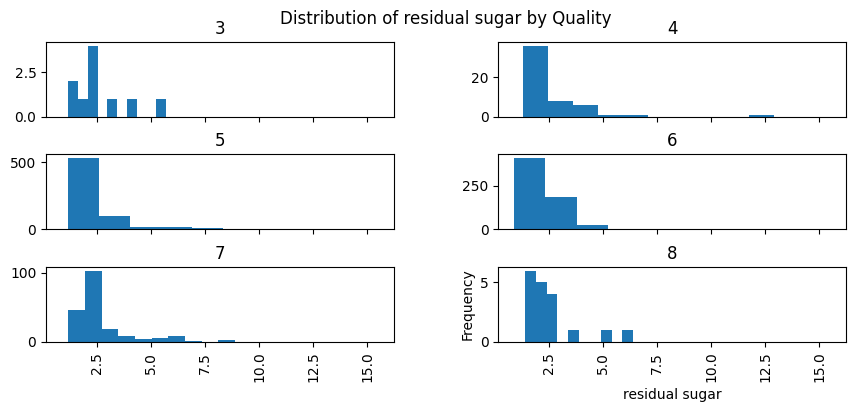

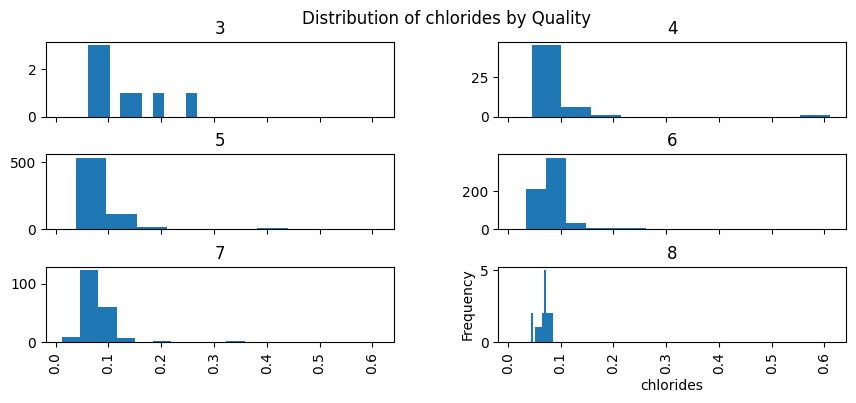

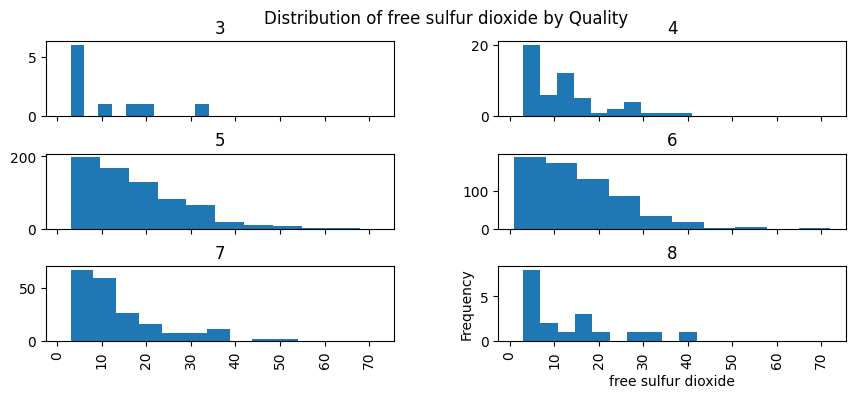

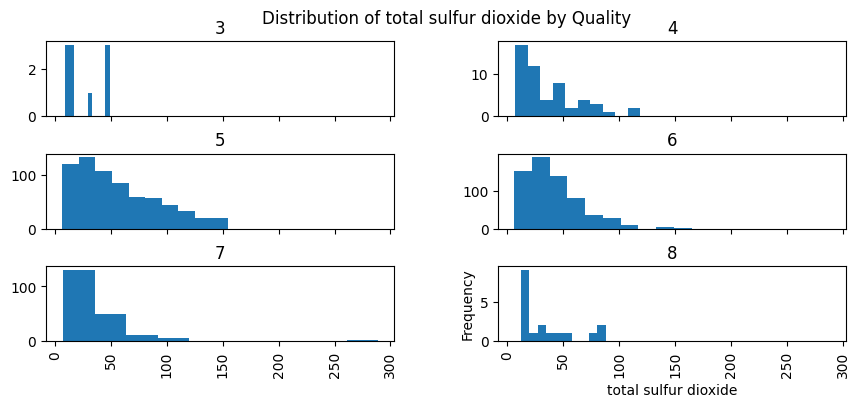

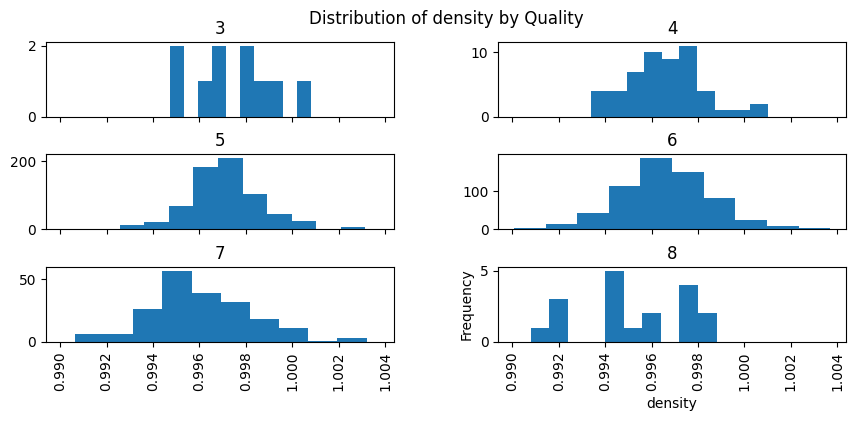

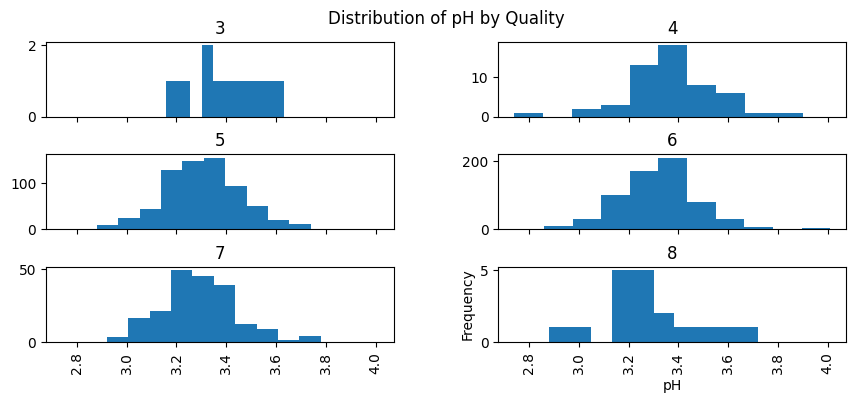

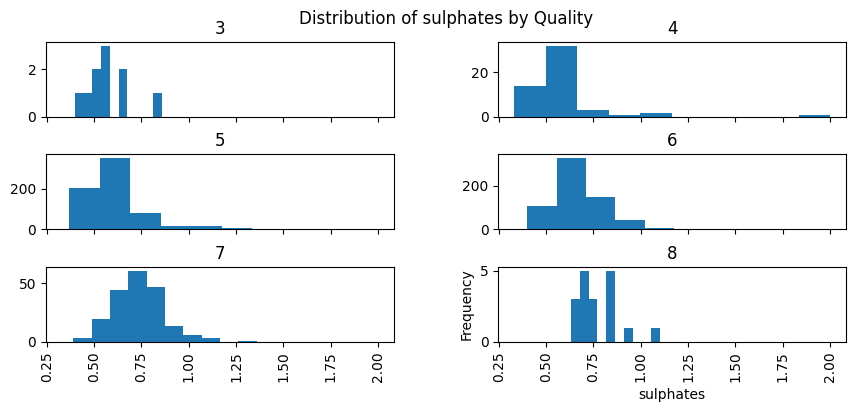

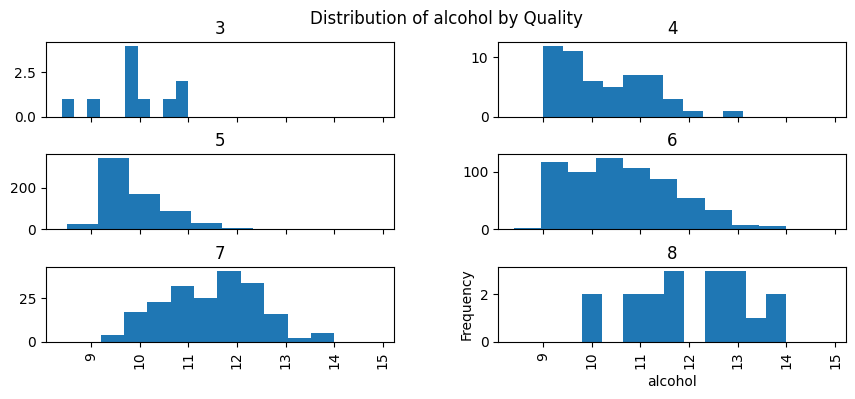

In [ ]:
for feature in wine_data.columns[:-1]:
    wine_data.hist(column=feature, by='quality', figsize=(10, 4), sharex=True)
    plt.suptitle(f"Distribution of {feature} by Quality")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()



##### **2.2 (2 points)** Explore correlations between features and quality ratings.
- Create a **correlation matrix** based on the correlations between features and quality
- **Display** the matrix

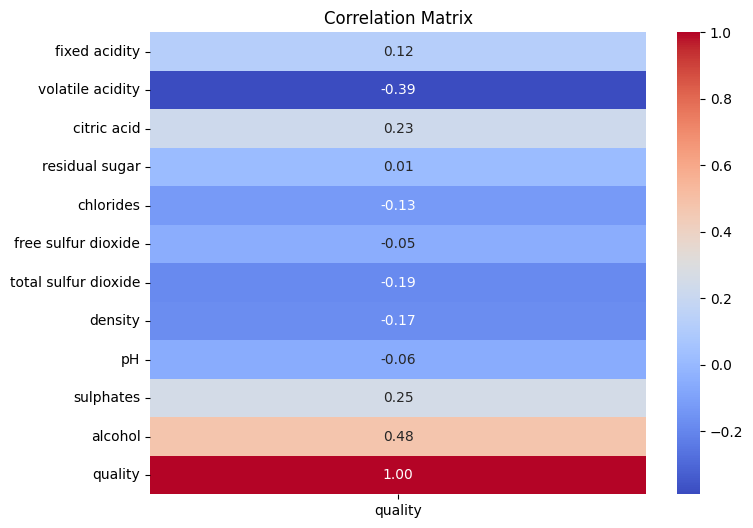

In [ ]:
correlation = wine_data.corr()['quality']

plt.figure(figsize=(8, 6))
sns.heatmap(correlation.to_frame(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### Part 3 (8 points total)
#### Your manager, Aishani Applecider, has asked you to utilize the data provided by Mr. Grapeglamour's wine brewery and come up with a model to predict whether to place each wine in the expensive wine aisle or not.

#### Let's prepare the data first!

***(Expensive wine = the quality of wine is strictly > 6)***

##### Feature Engineering

**3.1 (2 points)** *Quality* is a label and won't be used in our analysis. But perhaps we want to use another, binary label called *Expensive*. Create a new column called *Expensive* and make it 1 or 0 depending on the Quality value for each observation.

In [ ]:
wine_data['Expensive'] = wine_data['quality'].apply(lambda x: 1 if x > 6 else 0)
wine_data.head(15)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Expensive
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,0
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,0
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,1
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,1
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,0


**3.2 (2 points)** Standardize the **feature** set in order to make sure that the machine learning model is not biased by differences in scales/units within the data. Standardizations aids with consistency in the data.

*Hints: Look into these functions and classes* [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [62]:
features = wine_data.columns[:-2] #skip expensive and qual
scaler = StandardScaler()
scaled_features = scaler.fit_transform(wine_data[features])

scaled_features

array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.01092425,  0.54162988]])

##### Splitting, Training, and Testing
Typically in Machine learning, we wish to split the data into various portions in order to test a machine learning model on one part of the data and test it on another part of the data. This is to evaluate the model's performance on the dataset.

Training data is used to teach the model, while testing data assesses its generalization to unseen examples.

Splitting helps prevent overfitting, ensuring the model can make accurate predictions on new, unseen data.

**3.3 (2 points)** First, create a **features** object (**X**) and **the target label** object (**y**). X is a dataframe (a collection of columns) while y is just one column/vector.

In [67]:
# Write your code here
X = scaled_features
y = wine_data['quality']

**3.4 (2 points)** Split the features and target labels into **training and testing sets**. This is approximately 1 line of code. Test size should be **0.3**.

*Hint: Look into this function* [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [73]:
# pass this seed value to your argument: seed = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1119, 11)
(480, 11)
(1119,)
(480,)


### Part 4 (10 points total)

#### Your promotion is dependent on this project. Hence, Ms. Applecider asks you to be thorough with your model search. You are asked to train 4 different classifiers, namely **KNN**, **DecisionTree**, **Logistic Regression**, and **Random Forest**.

In [70]:
#run this cell to put your models in a dictionary and be able to iterate over them

models = {
    'KNN': KNeighborsClassifier(),
    'DecisionTree': DecisionTreeClassifier(),
    'LogisticRegression': LogisticRegression(),
    'RandomForest': RandomForestClassifier()
}

##### **4.1 (3 points)** Train each of the models.

**Note:** We are not using validation or hyperparameter tuning right now. You can run each model with default parameters (i.e. no arguments provided to the function).

In [83]:
# Train each model using the training data
for model_name, model in models.items():
  model.fit(X_train, y_train)


##### **4.2 (4 points)** Test each model

- Print the **accuracy** of each model in this **format**: Accuracy of [model name]: [accuracy of the model].
- Print a **classification report** for each model that lists its accuracy, precision, recall and f1-score.

*Hint: Look into this function!* [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)

In [84]:
# Evaluate the performance of each model
for model_name, model in models.items():
  y_pred = model.predict(X_test)
  performance = accuracy_score(y_test, y_pred)
  print(model_name, performance)



KNN 0.5708333333333333
DecisionTree 0.56875
LogisticRegression 0.5645833333333333
RandomForest 0.6541666666666667


##### **4.3 (3 points)** Model Interpretation
- **Interpret** the results of the classification models (list the models which got the best scores for Accuracy, Precision, Recall and F1 score).
- Recommend the best model according to your analysis.

**Random Forest method showed the highest accuracy, therefore it is the best option to use **

### Part 5. Feedback (1 point total)

#### This was my favorite so far no complaints.

*Share your thoughts here:*

### Part 6. Submitting your work

### Congrats on finishing PA4!

1. Save this notebook (`File > Save`).
2. Download it to your computer as `.ipynb` (`File > Download > Download .ipynb`).
3. Submit the .ipynb file on Canvas.

Tips:
1. After finishing the work, click on the arrow to the right of "Run all" and then click on "Clear all outputs" and "Restart session." Then run each cell in order to make sure everything compiles.
2. Remember to delete the cells you created for testing and any Gemini-affected cells if you used help from Gemini.